In [36]:
import re
import pandas as pd
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix

df=pd.read_csv('news.csv')
#Get shape and head
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [38]:
# data preprocessing
df.isnull().sum()
#df['title_text'] = df['title'] + ' ' + df['text']
df['label'].value_counts()


REAL    3171
FAKE    3164
Name: label, dtype: int64

In [39]:
df.replace(to_replace='[^A-Za-z0-9]+', value=' ', regex=True, inplace=True)
#convert uppercase
df = df.apply(lambda x: x.astype(str).str.lower())
def txtupper(text):
    text = text.upper()
    return text

df['label'] = df['label'].apply(txtupper)
df.head()

,Unnamed: 0,title,text,label
0,8476,you can smell hillary s fear,daniel greenfield a shillman journalism fellow...,FAKE
1,10294,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,kerry to go to paris in gesture of sympathy,u s secretary of state john f kerry said monda...,REAL
3,10142,bernie supporters on twitter erupt in anger ag...,kaydee king kaydeeking november 9 2016 the le...,FAKE
4,875,the battle of new york why this primary matters,it s primary day in new york and front runners...,REAL


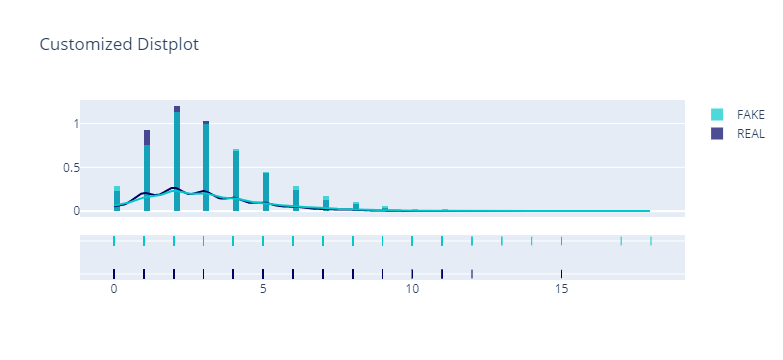

,Unnamed: 0,title,text,label,title_num_stop_words,title_word_count,title_pct_stop_words,text_num_stop_words,text_word_count,text_pct_stop_words
0,8476,you can smell hillary s fear,daniel greenfield a shillman journalism fellow...,FAKE,3,6,50.000000,90,1329,6.772009
1,10294,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,3,14,21.428571,65,459,14.161220
2,3608,kerry to go to paris in gesture of sympathy,u s secretary of state john f kerry said monda...,REAL,3,9,33.333333,56,439,12.756264
3,10142,bernie supporters on twitter erupt in anger ag...,kaydee king kaydeeking november 9 2016 the le...,FAKE,7,15,46.666667,53,419,12.649165
4,875,the battle of new york why this primary matters,it s primary day in new york and front runners...,REAL,4,9,44.444444,55,335,16.417910


In [40]:

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
from nltk.corpus import stopwords
import collections
import nltk

stop_words = set(stopwords.words('english'))
df['title_num_stop_words'] = df['title'].str.split().apply(lambda x: len(set(x) & stop_words))
df['title_word_count'] = df['title'].apply(lambda x: len(str(x).split()))
df['title_pct_stop_words'] = df['title_num_stop_words'] / df['title_word_count'] * 100
df['text_num_stop_words'] = df['text'].str.split().apply(lambda x: len(set(x) & stop_words))
df['text_word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['text_pct_stop_words'] = df['text_num_stop_words'] / df['text_word_count'] * 100

x1 = df.loc[df['label']=='REAL']['title_num_stop_words']
x2 = df.loc[df['label'] == 'FAKE']['title_num_stop_words']

group_labels = ['REAL', 'FAKE']

colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']
fig = ff.create_distplot([x1, x2], group_labels, bin_size=.2,colors=colors)

fig.update_layout(title_text='Customized Distplot')
fig.show()
df.head()

In [41]:
df.head()

,Unnamed: 0,title,text,label,title_num_stop_words,title_word_count,title_pct_stop_words,text_num_stop_words,text_word_count,text_pct_stop_words
0,8476,you can smell hillary s fear,daniel greenfield a shillman journalism fellow...,FAKE,3,6,50.000000,90,1329,6.772009
1,10294,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,3,14,21.428571,65,459,14.161220
2,3608,kerry to go to paris in gesture of sympathy,u s secretary of state john f kerry said monda...,REAL,3,9,33.333333,56,439,12.756264
3,10142,bernie supporters on twitter erupt in anger ag...,kaydee king kaydeeking november 9 2016 the le...,FAKE,7,15,46.666667,53,419,12.649165
4,875,the battle of new york why this primary matters,it s primary day in new york and front runners...,REAL,4,9,44.444444,55,335,16.417910


In [42]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()
 


,Unnamed: 0,title,text,label,title_num_stop_words,title_word_count,title_pct_stop_words,text_num_stop_words,text_word_count,text_pct_stop_words
0,8476,smell hillary fear,daniel greenfield shillman journalism fellow f...,FAKE,3,6,50.000000,90,1329,6.772009
1,10294,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,FAKE,3,14,21.428571,65,459,14.161220
2,3608,kerry go paris gesture sympathy,u secretary state john f kerry said monday sto...,REAL,3,9,33.333333,56,439,12.756264
3,10142,bernie supporters twitter erupt anger dnc trie...,kaydee king kaydeeking november 9 2016 lesson ...,FAKE,7,15,46.666667,53,419,12.649165
4,875,battle new york primary matters,primary day new york front runners hillary cli...,REAL,4,9,44.444444,55,335,16.417910


[3171, 3164]


([<matplotlib.patches.Wedge at 0x206b943fb80>,
 [Text(-1.1999981925060215, -0.002082782341417477, 'Fake'),
  Text(1.1999981925060215, 0.00208278234141733, 'True')],
 [Text(-0.6999989456285124, -0.0012149563658268615, '50.1%'),
  Text(0.6999989456285124, 0.0012149563658267757, '49.9%')])

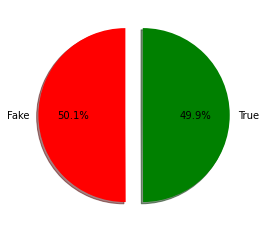

In [43]:
#data visualisation
import matplotlib.pyplot as plt
list1=df['label'].value_counts()
label_size=[list1['REAL'],list1['FAKE']]
print(label_size)
plt.pie(label_size,explode=[0.1,0.1],colors=['red','green'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')


In [44]:
df.drop('title_num_stop_words',axis=1,inplace= True)
df.drop('title_word_count',axis=1,inplace= True)
df.drop('title_pct_stop_words',axis=1,inplace= True)
df.drop('text_num_stop_words',axis=1,inplace= True)
df.drop('text_word_count',axis=1,inplace= True)
df.drop('text_pct_stop_words',axis=1,inplace= True)
df.drop('Unnamed: 0',axis=1,inplace= True)
df.head()


,title,text,label
0,smell hillary fear,daniel greenfield shillman journalism fellow f...,FAKE
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,kerry go paris gesture sympathy,u secretary state john f kerry said monday sto...,REAL
3,bernie supporters twitter erupt anger dnc trie...,kaydee king kaydeeking november 9 2016 lesson ...,FAKE
4,battle new york primary matters,primary day new york front runners hillary cli...,REAL


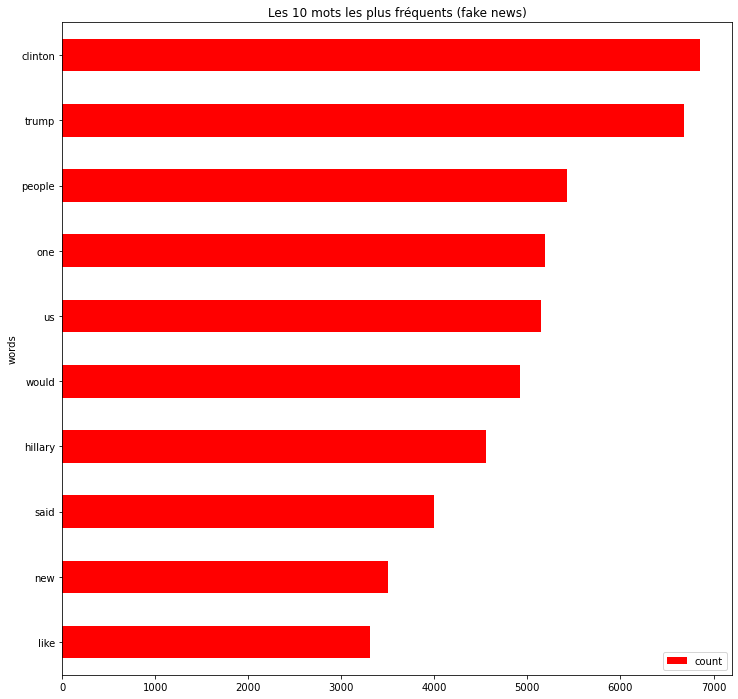

<Figure size 432x288 with 0 Axes>

In [46]:
#stat nombre de mot
dffake = df[df['label'] == 'FAKE']
#dffake1 = dffake['title_text']
dfreal = df[df['label'] == 'REAL']
#dfreal1 = dfreal['title_text']
S_real= ""
for i in range (0,len(dfreal)):
    S_real = S_real + dfreal.iloc[i,1]

S_fake= ""
for i in range (0,len(dffake)):
    S_fake = S_fake + dffake.iloc[i,1]

list_of_words_real = S_real.split()
list_of_words_fake = S_fake.split()
import collections
counts_nsw_r = collections.Counter(list_of_words_real)
counts_nsw_f = collections.Counter(list_of_words_fake)
count_mc_f = pd.DataFrame(counts_nsw_f.most_common(10),
                             columns=['words', 'count'])
count_mc_f.head()
count_mc_r = pd.DataFrame(counts_nsw_r.most_common(10),
                             columns=['words', 'count'])
count_mc_r.head()

fig, ax = plt.subplots(figsize=(12, 12))

# Plot horizontal bar graph
count_mc_f.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Les 10 mots les plus fréquents (fake news)")

plt.show()

plt.savefig('fake_words.png')

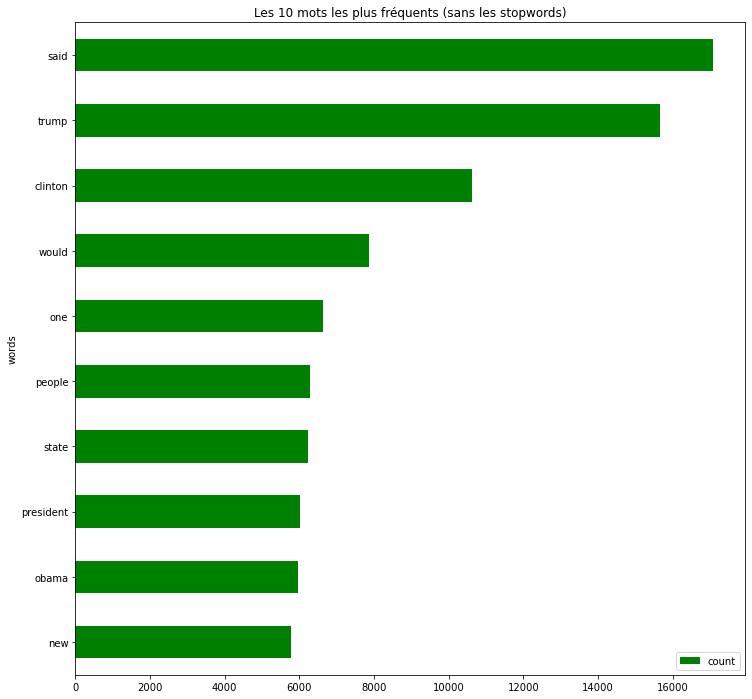

<Figure size 432x288 with 0 Axes>

In [47]:
fig, ax = plt.subplots(figsize=(12, 12))

# Plot horizontal bar graph
count_mc_r.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Les 10 mots les plus fréquents (sans les stopwords)")

plt.show()
plt.savefig('truee_words.png')

In [51]:
import re
import pandas as pd
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegression
label_num={"label":{"FAKE":0,"REAL":1}}
df.replace(label_num, inplace=True)
porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None,
                        tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True)
X = tfidf.fit_transform(df['text'])
y = df.label.values

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5) 

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.92


In [52]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[600  37]
 [ 63 567]]


<AxesSubplot:>

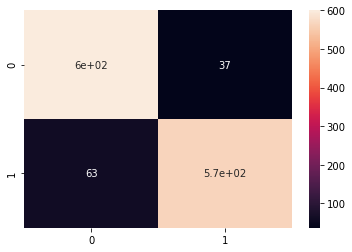

In [53]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

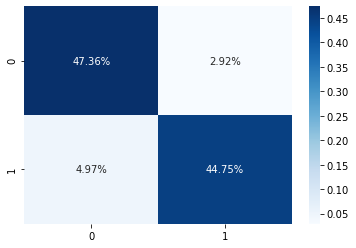

In [54]:
import numpy as np
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       637
           1       0.94      0.90      0.92       630

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [56]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(logreg, X, y, cv=5)
print("accurancy :", scores)
print("average" , sum(scores)/5)

accurancy : [0.92186267 0.91397001 0.92265193 0.91791634 0.92265193]
average 0.9198105761641674


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #

Accuracy: 0.8287292817679558


In [58]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree1 = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'best', max_leaf_nodes =10,min_samples_leaf = 5,max_depth= 5)
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7797947908445146


In [59]:
import pickle
Pkl_Filename = "Pickle_FAKENEWS_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logreg, file)